In [22]:
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob
from imutils import paths
import os
import matplotlib.pyplot as plt

In [2]:
image_paths=list(paths.list_images(r'C:\Users\shruti and rahul\Desktop\Python\Python course\Projects\Realtime Object detection\Real time detection\Image dataset'))
data=[]
labels=[]

for i in image_paths:
    label=i.split(os.path.sep)[-2]
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)
    labels.append(label)
    
data=np.array(data, dtype='float32')
labels=np.array(labels)

In [23]:
resnet=ResNet50V2(weights='imagenet',include_top=False,input_shape=(224,224,3))

for layer in resnet.layers:
    layer.trainable=False
    
x=AveragePooling2D(pool_size=(7,7))(resnet.output)
x=Flatten()(x)
x=Dense(128, activation='relu')(x)
x=Dropout(0.5)(x)
predictions=Dense(2,activation='softmax')(x)

model=Model(inputs=resnet.input, outputs=predictions)
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [4]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [5]:
trainX,testX,trainY,testY=train_test_split(data,labels,test_size=0.2, stratify=labels, random_state=42)

In [6]:
aug = ImageDataGenerator(rotation_range=20,
                          zoom_range=0.15,
                          shear_range=0.15,
                          horizontal_flip=True,
                          fill_mode="nearest")


In [24]:
Epochs=20
Batch_size=32

print('Training the model....')

M=model.fit(aug.flow(trainX,trainY),
           steps_per_epoch=len(trainX)//Batch_size,
           validation_data=(testX,testY),
           validation_steps=len(testX)//Batch_size,
           epochs=Epochs)


Training the model....
Epoch 1/20
7/7 [==============================] - 28s 4s/step - loss: 0.8057 - accuracy: 0.6238 - val_loss: 0.2618 - val_accuracy: 0.8833
Epoch 2/20
7/7 [==============================] - 24s 3s/step - loss: 0.2510 - accuracy: 0.8873 - val_loss: 0.2619 - val_accuracy: 0.9167
Epoch 3/20
7/7 [==============================] - 23s 3s/step - loss: 0.2603 - accuracy: 0.9103 - val_loss: 0.2504 - val_accuracy: 0.9167
Epoch 4/20
7/7 [==============================] - 24s 3s/step - loss: 0.1756 - accuracy: 0.9496 - val_loss: 0.2263 - val_accuracy: 0.9333
Epoch 5/20
7/7 [==============================] - 24s 3s/step - loss: 0.1040 - accuracy: 0.9620 - val_loss: 0.2853 - val_accuracy: 0.9000
Epoch 6/20
7/7 [==============================] - 24s 3s/step - loss: 0.1149 - accuracy: 0.9238 - val_loss: 0.2182 - val_accuracy: 0.9500
Epoch 7/20
7/7 [==============================] - 24s 4s/step - loss: 0.1228 - accuracy: 0.9480 - val_loss: 0.2142 - val_accuracy: 0.9167
Epoch 8/20


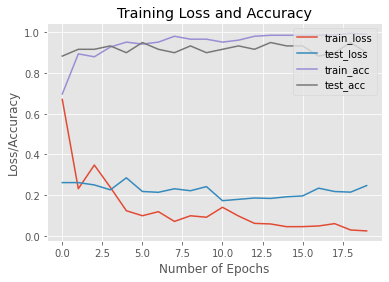

In [25]:
N=Epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,N),M.history['loss'],label='train_loss')
plt.plot(np.arange(0,N),M.history['val_loss'],label='test_loss')
plt.plot(np.arange(0,N),M.history['accuracy'],label='train_acc')
plt.plot(np.arange(0,N),M.history['val_accuracy'],label='test_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='upper right')
plt.savefig('Test2_with_regularization')

In [26]:
model.save('mask_detector.h5')